# *Regression Models*

Dataset:
Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [bike](https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand).

## *Linear Regression*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression

In [2]:
dataset_cols = ["bike_count", "hour", "temp", "humidity", "wind", "visibility", "dew_pt_temp", "radiation", "rain", "snow", "functional"]
df = pd.read_csv(r"E:\COADING\DataSet\SeoulBikeData.csv", encoding = "latin1").drop(["Date", "Seasons", "Holiday"], axis = 1)

In [3]:
df.columns = dataset_cols
df["functional"] = (df["functional"] == "Yes").astype(int)
df = df[df["hour"] == 12]
df = df.drop(["hour"], axis = 1)

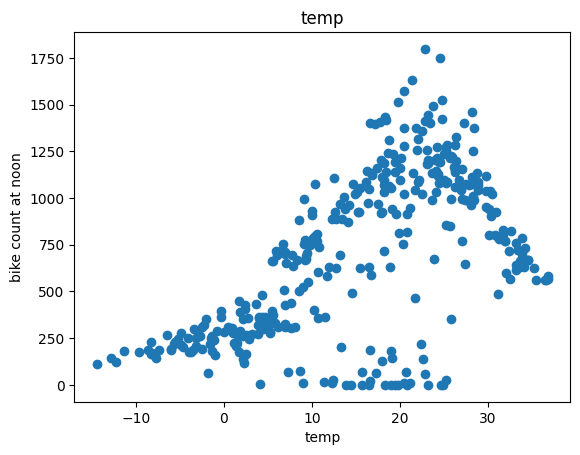

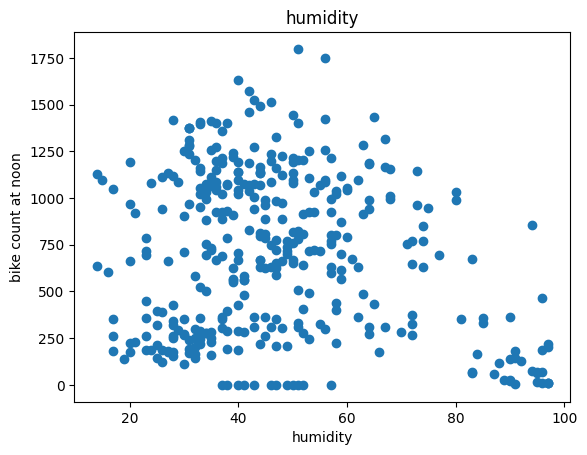

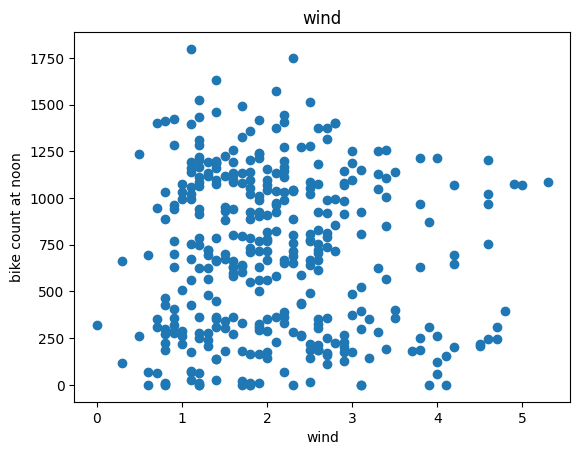

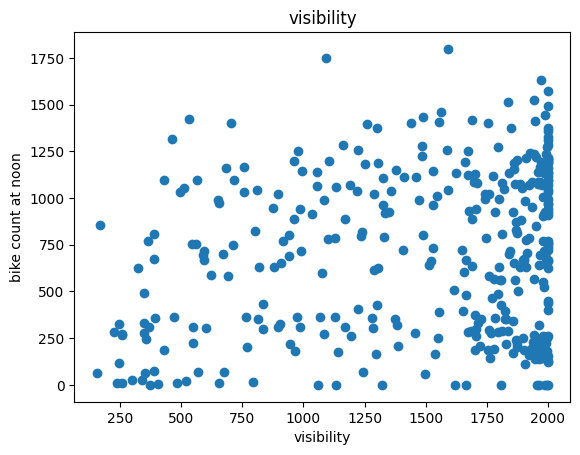

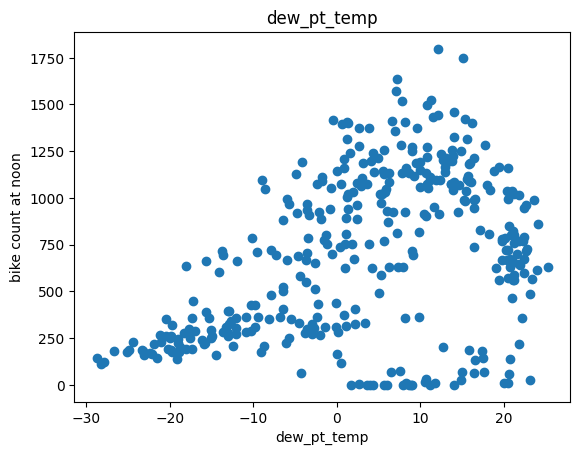

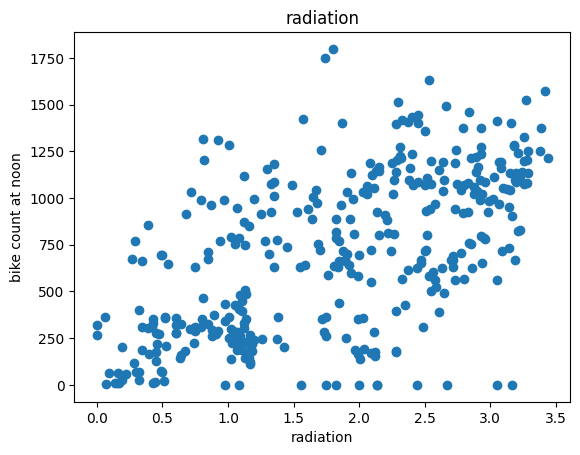

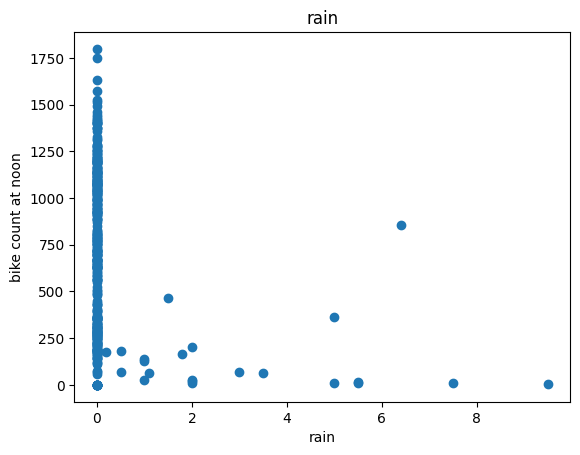

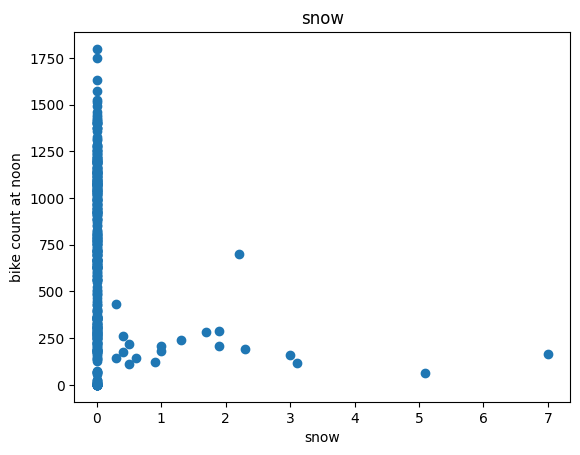

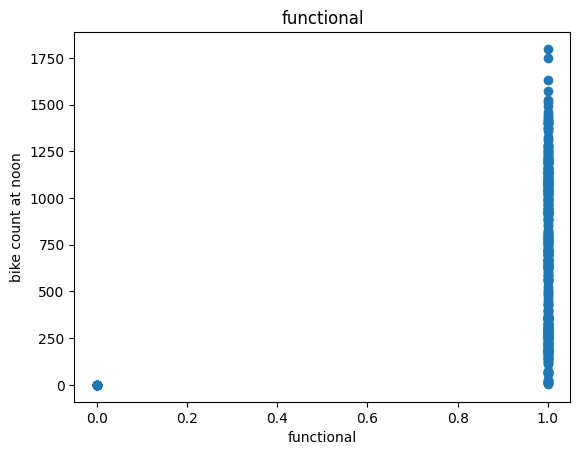

In [4]:
for label in df.columns[1:]:
    plt.scatter(df[label], df["bike_count"])
    plt.title(label)
    plt.xlabel(label)
    plt.ylabel("bike count at noon")
    plt.show()

In [5]:
# removing featurs that doesn't really matters
#(like how i don't matter for her)
df =df.drop(['functional', 'wind', 'visibility'], axis = 1)


In [6]:
df

bike_count  temp  humidity  dew_pt_temp  radiation  rain  snow
12           449   1.7        23        -17.2       1.11   0.0   0.0
36           479   4.3        41         -7.8       1.09   0.0   0.0
60           333   5.8        85          3.4       0.43   0.0   0.0
84           393  -0.3        38        -12.9       1.11   0.0   0.0
108          321  -2.3        25        -19.7       0.00   0.0   0.0
...          ...   ...       ...          ...        ...   ...   ...
8652         752   9.1        57          1.0       1.69   0.0   0.0
8676         672   9.3        61          2.1       0.85   0.0   0.0
8700         635   7.9        14        -18.0       1.81   0.0   0.0
8724         661   5.6        27        -11.9       0.34   0.0   0.0
8748         720   6.6        35         -7.8       1.70   0.0   0.0

[365 rows x 7 columns]

### *Train, test and validate dataset*

In [7]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

C:\Users\91991\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [8]:
train

bike_count  temp  humidity  dew_pt_temp  radiation  rain  snow
2172         311   0.5        46         -9.8       2.49   0.0   0.0
3108         799  10.4        44         -1.3       2.93   0.0   0.0
1476         160  -1.0        35        -14.5       0.64   0.0   3.0
5820         626  35.2        39         19.1       2.86   0.0   0.0
1956         356   4.0        23        -15.3       2.03   0.0   0.0
...          ...   ...       ...          ...        ...   ...   ...
6756        1273  25.2        36          9.0       2.93   0.0   0.0
7308        1138  18.4        40          4.5       2.28   0.0   0.0
7572        1073  14.7        38          0.5       2.55   0.0   0.0
2772         492  14.6        53          5.1       2.65   0.0   0.0
4044         185  16.6        96         15.9       0.34   0.0   0.0

[219 rows x 7 columns]

In [9]:
test

bike_count  temp  humidity  dew_pt_temp  radiation  rain  snow
3588        1375  20.5        31          2.7       2.79   0.0   0.0
8388         942  13.8        43          1.4       1.61   0.0   0.0
4452        1152  26.3        36         10.0       2.61   0.0   0.0
6708        1041  26.9        60         18.4       1.67   0.0   0.0
5604         560  35.5        39         19.4       3.05   0.0   0.0
...          ...   ...       ...          ...        ...   ...   ...
7260        1495  23.8        44         10.8       2.66   0.0   0.0
3204        1095  18.2        15         -8.9       2.27   0.0   0.0
8532         697   7.7        34         -7.2       0.49   0.0   0.0
5916         640  33.2        52         22.0       1.59   0.0   0.0
3732        1258  21.9        35          5.7       2.74   0.0   0.0

[73 rows x 7 columns]

In [10]:
valid

bike_count  temp  humidity  dew_pt_temp  radiation  rain  snow
6180         563  36.5        41         21.1       2.73   0.0   0.0
3972        1058  26.3        36         10.0       2.88   0.0   0.0
4476        1111  28.2        35         11.2       3.23   0.0   0.0
540          325   7.0        72          2.2       0.64   0.0   0.0
5460         719  32.4        49         20.3       3.09   0.0   0.0
...          ...   ...       ...          ...        ...   ...   ...
6996           0  24.7        43         11.2       1.75   0.0   0.0
1260         323   3.9        28        -12.9       0.60   0.0   0.0
6108         670  33.8        44         19.8       2.72   0.0   0.0
828          290  -2.9        33        -16.9       0.92   0.0   0.0
6588        1086  28.9        46         16.1       2.96   0.0   0.0

[73 rows x 7 columns]

In [11]:
def get_xy(dataframe, y_label, x_labels=None):
    dataframe = copy.deepcopy(dataframe)
    if x_labels is None:
        X = dataframe[[c for c in dataframe.columns if c != y_label]].values
    else:
        if len(dataframe) == 1:
            X = dataframe[x_labels[0]].values.reshape(-1, 1)
        else:
            X = dataframe[x_labels].values

    y = dataframe[y_label].values.reshape(-1, 1)
    data = np.hstack((X, y))

    return data, X, y

In [12]:
_, X_train_temp, y_train_temp = get_xy(train, "bike_count", x_labels = ["temp"])
_, X_test_temp, y_test_temp = get_xy(test, "bike_count", x_labels = ["temp"])
_, X_valid_temp, y_valid_temp = get_xy(valid, "bike_count", x_labels = ["temp"])

In [13]:
temp_reg = LinearRegression()
temp_reg.fit(X_train_temp, y_train_temp)

LinearRegression()

In [14]:
temp_reg.score(X_test_temp, y_test_temp)

0.24663581633095388

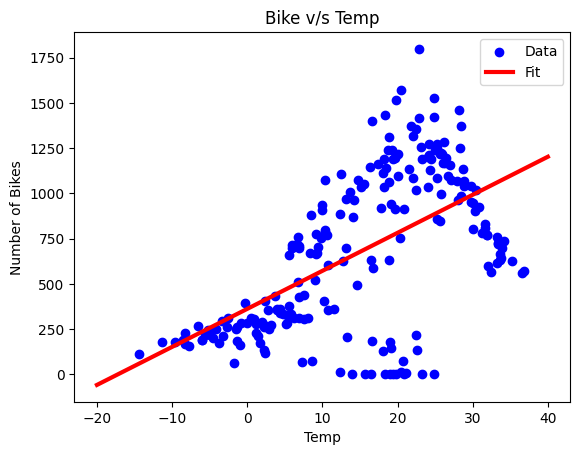

In [15]:
plt.scatter(X_train_temp, y_train_temp, label = "Data", color = "blue")
x = tf.linspace(-20, 40, 100)
plt.plot(x, temp_reg.predict(np.array(x).reshape(-1, 1)), label = "Fit", color = "red", linewidth = 3)
plt.legend()
plt.title("Bike v/s Temp")
plt.ylabel("Number of Bikes")
plt.xlabel("Temp")
plt.show()

## *Multiple Linear Regression*

In [16]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])
_, X_train_all, y_train_all = get_xy(train, "bike_count", x_labels = df.columns[1:])
_, X_test_all, y_test_all = get_xy(test, "bike_count", x_labels = df.columns[1:])
_, X_valid_all, y_valid_all = get_xy(valid, "bike_count", x_labels = df.columns[1:])

C:\Users\91991\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [17]:
all_reg = LinearRegression()
all_reg.fit(X_train_all, y_train_all)

LinearRegression()

In [18]:
all_reg.score(X_test_all, y_test_all)

0.42060841680952654

In [37]:
y_pred_lr = all_reg.predict(X_test_all)

### *Regression With neural network*

In [19]:
def plot_loss(history):
    plt.plot(history.history['loss'], label = "loss")
    plt.plot(history.history['val_loss'], label = "val_loss")

    plt.ylabel("MSE")
    plt.xlabel("Epoch")
    plt.legend()
    plt.grid(True)
    plt.show()

In [20]:
temp_normalizer = tf.keras.layers.Normalization(input_shape = (1,), axis = None)
temp_normalizer.adapt(X_train_temp.reshape(-1))

C:\Users\91991\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
temp_nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(1)
])

In [22]:
temp_nn_model.compile(optimizer =  tf.keras.optimizers.Adam(learning_rate = 0.1), loss = "mean_squared_error")

In [23]:
history = temp_nn_model.fit(
    X_train_temp.reshape(-1), y_train_temp,
    verbose = 0,
    epochs = 1000,
    validation_data = (X_valid_temp, y_valid_temp)
)

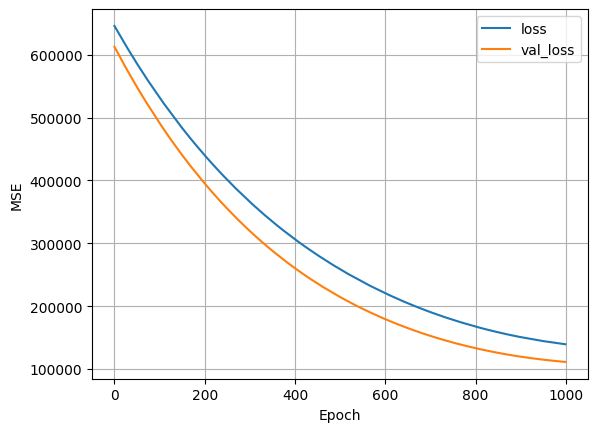

In [24]:
plot_loss(history)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step 


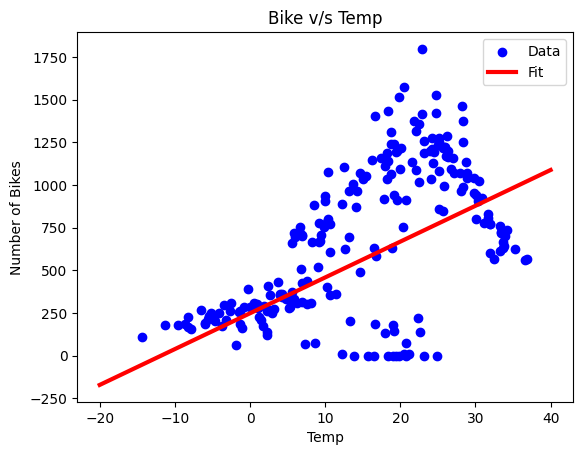

In [25]:
plt.scatter(X_train_temp, y_train_temp, label = "Data", color = "blue")
x = tf.linspace(-20, 40, 100)
plt.plot(x, temp_nn_model.predict(np.array(x).reshape(-1, 1)), label = "Fit", color = "red", linewidth = 3)
plt.legend()
plt.title("Bike v/s Temp")
plt.ylabel("Number of Bikes")
plt.xlabel("Temp")
plt.show()

### *NeuralNet*

In [26]:
temp_normalizer = tf.keras.layers.Normalization(input_shape = (1,), axis = None)
temp_normalizer.adapt(X_train_temp.reshape(-1))

nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(1)
])
nn_model.compile(optimizer =  tf.keras.optimizers.Adam(learning_rate = 0.001), loss = "mean_squared_error")

In [27]:
nn_history = nn_model.fit(
    X_train_temp, y_train_temp,
    validation_data = (X_valid_temp, y_valid_temp),
    epochs = 100, verbose = 0  
)

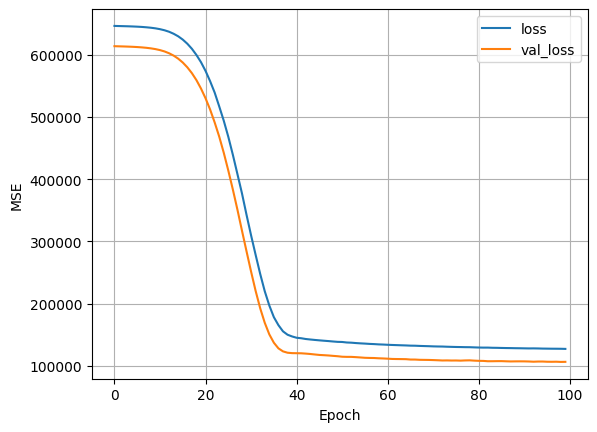

In [28]:
plot_loss(nn_history)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step 


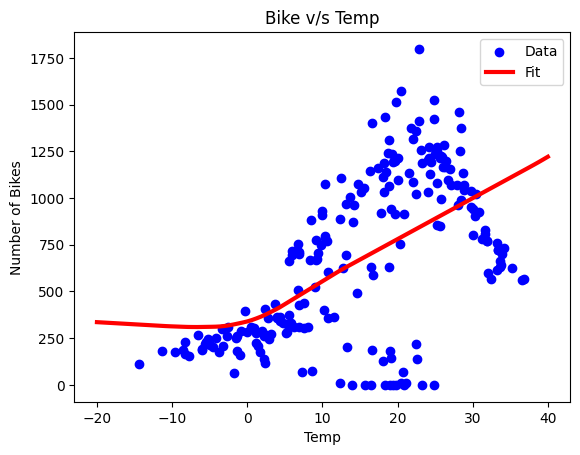

In [29]:
plt.scatter(X_train_temp, y_train_temp, label = "Data", color = "blue")
x = tf.linspace(-20, 40, 100)
plt.plot(x, nn_model.predict(np.array(x).reshape(-1, 1)), label = "Fit", color = "red", linewidth = 3)
plt.legend()
plt.title("Bike v/s Temp")
plt.ylabel("Number of Bikes")
plt.xlabel("Temp")
plt.show()

In [30]:
all_normalizer = tf.keras.layers.Normalization(input_shape = (6,), axis =-1)
all_normalizer.adapt(X_train_all)

In [31]:
nn_model = tf.keras.Sequential([
    all_normalizer,
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    # tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(1)
])
nn_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), loss = "mean_squared_error")

In [32]:
history = nn_model.fit(
    X_train_all, y_train_all,
    validation_data = (X_valid_all, y_valid_all),
    epochs = 100, verbose = 0  
)

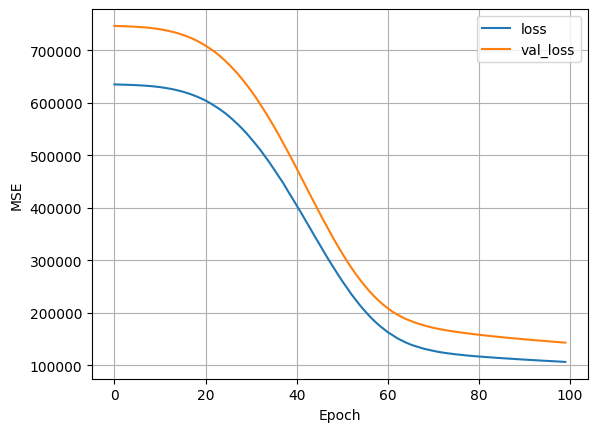

In [33]:
plot_loss(history)

## Calculate the MSE for both linear reg and nn 

In [39]:
y_pred_lr = all_reg.predict(X_test_all)
y_pred_nn = nn_model.predict(X_test_all)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


In [40]:
def MSE(y_pred, y_real):
    return (np.square(y_pred - y_real)).mean()

In [41]:
MSE(y_pred_lr, y_test_all)

111185.81583406699

In [42]:
MSE(y_pred_nn, y_test_all)


146608.37825259307

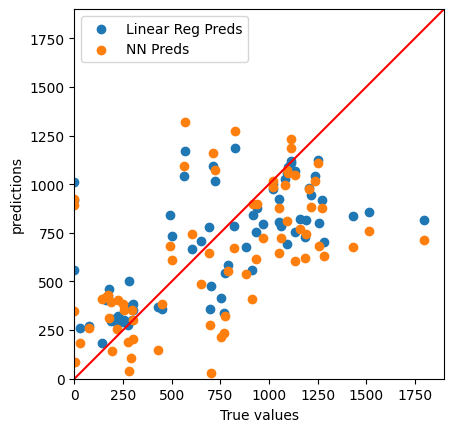

In [48]:
ax = plt.axes(aspect = "equal")
plt.scatter(y_test_all, y_pred_lr, label = "Linear Reg Preds")
plt.scatter(y_test_all, y_pred_nn, label = "NN Preds")

plt.xlabel("True values")
plt.ylabel("predictions")
lims = [0, 1900]
plt.xlim(lims)
plt.ylim(lims)
plt.legend()
_ = plt.plot(lims, lims, c = "red")